# TikTok Candidates – Analysis Notebook

Exploratory analysis for the **Top 10 Storting candidates on TikTok**.

**Context source:** NRK – Ble kastet ut fra Dagsnytt 18 – nå tar Gyda Oddekalv av på TikTok
Link: https://www.nrk.no/norge/ble-kastet-ut-fra-dagsnytt-18-_-na-tar-gyda-oddekalv-av-pa-tiktok-1.17547466


In [7]:
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
df = pd.read_csv('candidates.csv')
df['Engasjement'] = df['Likerklikk'] + df['Kommentarer'] + df['Delinger']
df['Engasjementsrate_%'] = (df['Engasjement'] / df['Visninger'] * 100)
df.head()

,Kandidat,Parti,Likerklikk,Kommentarer,Delinger,Visninger,SUM,Engasjement,Engasjementsrate_%
0,Jonas Ali,MDG,375418,23854,35759,8214130,8649161,435031,5.296130
1,Jonas Gahr Støre,Ap,330236,6340,36034,4374761,4747371,372610,8.517265
2,Ola Svenneby,H,200416,2889,12914,2966695,3182914,216219,7.288211
3,Erna Solberg,H,153264,5026,28668,2858186,3045144,186958,6.541142
4,Eivind Trædal,MDG,397333,40653,21931,2346207,2806124,459917,19.602576


## Summary statistics

In [8]:
df.describe(include='all')

,Kandidat,Parti,Likerklikk,Kommentarer,Delinger,Visninger,SUM,Engasjement,Engasjementsrate_%
count,10,10,10.000000,10.000000,10.000000,1.000000e+01,1.000000e+01,10.000000,10.000000
unique,10,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Jonas Ali,MDG,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,199426.900000,10527.100000,18512.000000,3.066164e+06,3.294630e+06,228466.000000,7.946782
std,NaN,NaN,123735.141391,12507.235617,11216.932141,1.999495e+06,2.097195e+06,142008.710008,4.446737
min,NaN,NaN,49048.000000,2463.000000,7328.000000,1.227956e+06,1.332219e+06,62889.000000,3.510069
25%,NaN,NaN,118851.500000,3076.750000,11241.000000,1.930307e+06,2.116198e+06,134003.000000,5.607383
50%,NaN,NaN,149668.000000,4833.500000,12315.000000,2.551362e+06,2.771412e+06,175183.500000,6.922320
75%,NaN,NaN,297781.000000,11446.750000,26983.750000,2.939568e+06,3.148472e+06,333512.250000,8.510643


## Rankings

In [9]:
df_rank_sum = df.sort_values('SUM', ascending=False)[['Kandidat','Parti','SUM','Visninger','Engasjement','Engasjementsrate_%']]
df_rank_sum

,Kandidat,Parti,SUM,Visninger,Engasjement,Engasjementsrate_%
0,Jonas Ali,MDG,8649161,8214130,435031,5.296130
1,Jonas Gahr Støre,Ap,4747371,4374761,372610,8.517265
2,Ola Svenneby,H,3182914,2966695,216219,7.288211
3,Erna Solberg,H,3045144,2858186,186958,6.541142
4,Eivind Trædal,MDG,2806124,2346207,459917,19.602576
5,Dordi Boksasp Lerum,Sp,2736700,2610376,126324,4.839303
6,Gyda Oddekalv,GP,2655757,2492348,163409,6.556428
7,Simen Velle,FrP,1936345,1779305,157040,8.825918
8,Stina Strande,Sp,1854563,1791674,62889,3.510069
9,Kristin Lode,FrP,1332219,1227956,104263,8.490777


In [10]:
df_rank_er = df.sort_values('Engasjementsrate_%', ascending=False)[['Kandidat','Parti','Engasjementsrate_%','Visninger','Engasjement']]
df_rank_er

,Kandidat,Parti,Engasjementsrate_%,Visninger,Engasjement
4,Eivind Trædal,MDG,19.602576,2346207,459917
7,Simen Velle,FrP,8.825918,1779305,157040
1,Jonas Gahr Støre,Ap,8.517265,4374761,372610
9,Kristin Lode,FrP,8.490777,1227956,104263
2,Ola Svenneby,H,7.288211,2966695,216219
6,Gyda Oddekalv,GP,6.556428,2492348,163409
3,Erna Solberg,H,6.541142,2858186,186958
0,Jonas Ali,MDG,5.296130,8214130,435031
5,Dordi Boksasp Lerum,Sp,4.839303,2610376,126324
8,Stina Strande,Sp,3.510069,1791674,62889


## Visualizations (matplotlib)

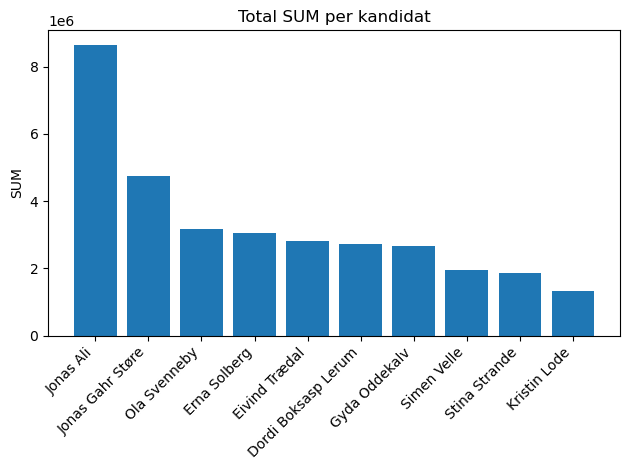

In [11]:
# Bar: SUM per candidate
plt.figure()
ordered = df.sort_values('SUM', ascending=False)
plt.bar(ordered['Kandidat'], ordered['SUM'])
plt.xticks(rotation=45, ha='right')
plt.title('Total SUM per kandidat')
plt.ylabel('SUM')
plt.tight_layout()
plt.show()

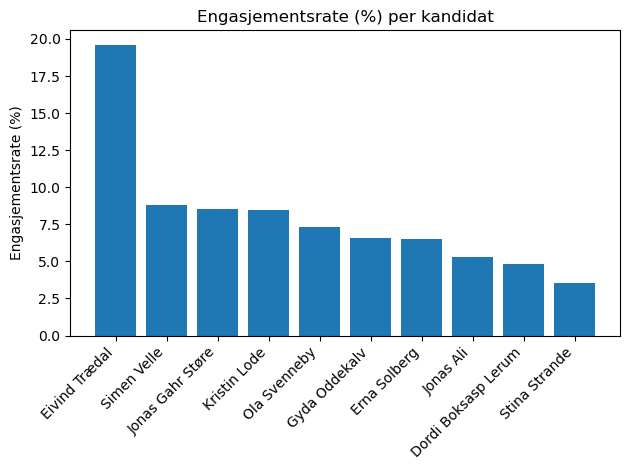

In [12]:
# Bar: Engagement rate (%) per candidate
plt.figure()
ordered2 = df.sort_values('Engasjementsrate_%', ascending=False)
plt.bar(ordered2['Kandidat'], ordered2['Engasjementsrate_%'])
plt.xticks(rotation=45, ha='right')
plt.title('Engasjementsrate (%) per kandidat')
plt.ylabel('Engasjementsrate (%)')
plt.tight_layout()
plt.show()

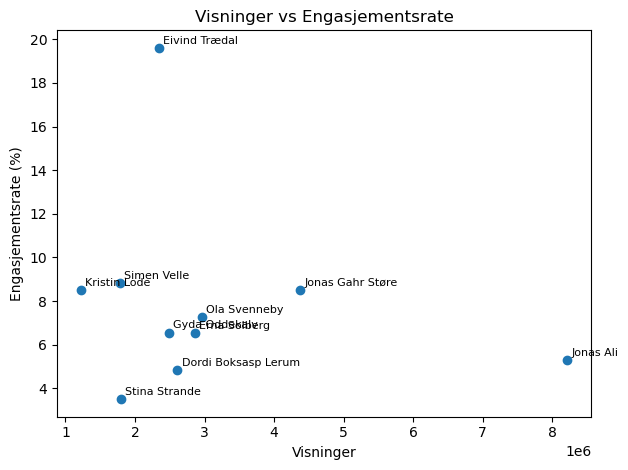

In [13]:
# Scatter: Views vs Engagement Rate
plt.figure()
plt.scatter(df['Visninger'], df['Engasjementsrate_%'])
for i, row in df.iterrows():
    plt.annotate(row['Kandidat'], (row['Visninger'], row['Engasjementsrate_%']), fontsize=8, xytext=(3,3), textcoords='offset points')
plt.xlabel('Visninger')
plt.ylabel('Engasjementsrate (%)')
plt.title('Visninger vs Engasjementsrate')
plt.tight_layout()
plt.show()

## Party-level aggregates

In [14]:
party = df.groupby('Parti', as_index=False).agg({
    'Visninger':'sum', 'Likerklikk':'sum', 'Kommentarer':'sum', 'Delinger':'sum', 'SUM':'sum', 'Engasjement':'sum'
})
party['Engasjementsrate_%'] = party['Engasjement'] / party['Visninger'] * 100
party.sort_values('SUM', ascending=False)

,Parti,Visninger,Likerklikk,Kommentarer,Delinger,SUM,Engasjement,Engasjementsrate_%
4,MDG,10560337,772751,64507,57690,11455285,894948,8.474616
3,H,5824881,353680,7915,41582,6228058,403177,6.921635
0,Ap,4374761,330236,6340,36034,4747371,372610,8.517265
5,Sp,4402050,161193,5079,22941,4591263,189213,4.298293
1,FrP,3007261,237438,8281,15584,3268564,261303,8.689070
2,GP,2492348,138971,13149,11289,2655757,163409,6.556428


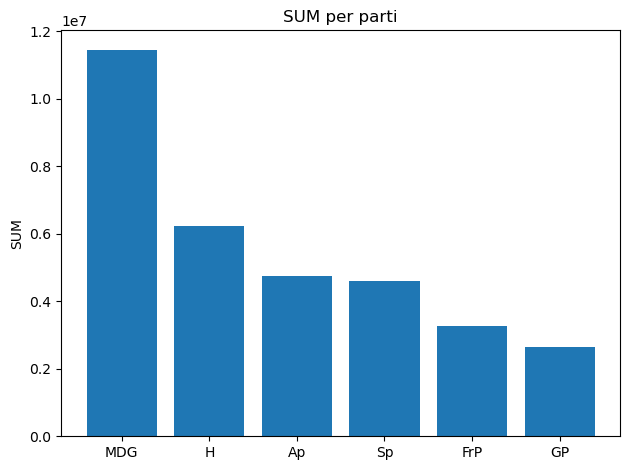

In [15]:
# Bar: SUM per party
plt.figure()
orderedp = party.sort_values('SUM', ascending=False)
plt.bar(orderedp['Parti'], orderedp['SUM'])
plt.title('SUM per parti')
plt.ylabel('SUM')
plt.tight_layout()
plt.show()